In [362]:
import pandas as pd

pd.options.mode.chained_assignment = None
file_path = "C:/Users/HassanAlhawari/OneDrive - JAEMACOM GmbH/Desktop/sf-crime/train.csv/train.csv"
# read csv
df = pd.read_csv(file_path)
crimes_we_need = ["LARCENY/THEFT", "ASSAULT", "DRUG/NARCOTIC", "VEHICLE THEFT", "BURGLARY"]
filter_df = df[df['Category'].isin(crimes_we_need)]
# this code may take a while
filter_df['Dates'] = pd.to_datetime(filter_df['Dates'], infer_datetime_format=True)
filter_df

C:\Users\HassanAlhawari\AppData\Local\Temp\ipykernel_17880\3731812591.py:10: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  filter_df['Dates'] = pd.to_datetime(filter_df['Dates'], infer_datetime_format=True)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564
...,...,...,...,...,...,...,...,...,...
878036,2003-01-06 00:55:00,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Monday,NORTHERN,NONE,1300 Block of WEBSTER ST,-122.431046,37.783030
878040,2003-01-06 00:33:00,ASSAULT,INFLICT INJURY ON COHABITEE,Monday,MISSION,NONE,2800 Block of FOLSOM ST,-122.414073,37.751685
878042,2003-01-06 00:20:00,ASSAULT,ATTEMPTED HOMICIDE WITH A GUN,Monday,BAYVIEW,"ARREST, BOOKED",1500 Block of SHAFTER AV,-122.389769,37.730564
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948


In [395]:
# Introducing a "political direction" feature to examine whether crime rates correlate
# with specific governmental policies
# George W. Bush (Republican Party)
# Term: January 2001 - January 2009
# Barack Obama (Democratic Party)
# Term: January 2009 - January 2017 (Forrest and Michael, 2023)

filter_df['POLITICAL DIRECTION'] = filter_df['Dates'].map(lambda x: 'REPUBLIC' if  (x.year < 2009 or  (x.year == 2009 and x.month == 1 and x.day <= 20)) else 'DEMOCRATIC')

filter_df

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,POLITICAL DIRECTION,Min.TemperatureF,Mean.TemperatureF,Max.TemperatureF,Mean.Humidity,Events,season
0,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,DEMOCRATIC,52.0,59.0,65,61.0,Clear,Spring
1,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,DEMOCRATIC,52.0,59.0,65,61.0,Clear,Spring
2,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431,DEMOCRATIC,52.0,59.0,65,61.0,Clear,Spring
3,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138,DEMOCRATIC,52.0,59.0,65,61.0,Clear,Spring
4,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564,DEMOCRATIC,52.0,59.0,65,61.0,Clear,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396278,2003-01-06 00:55:00,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Monday,NORTHERN,NONE,1300 Block of WEBSTER ST,-122.431046,37.783030,REPUBLIC,51.0,58.0,66,55.0,Clear,Winter
396279,2003-01-06 00:33:00,ASSAULT,INFLICT INJURY ON COHABITEE,Monday,MISSION,NONE,2800 Block of FOLSOM ST,-122.414073,37.751685,REPUBLIC,51.0,58.0,66,55.0,Clear,Winter
396280,2003-01-06 00:20:00,ASSAULT,ATTEMPTED HOMICIDE WITH A GUN,Monday,BAYVIEW,"ARREST, BOOKED",1500 Block of SHAFTER AV,-122.389769,37.730564,REPUBLIC,51.0,58.0,66,55.0,Clear,Winter
396281,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948,REPUBLIC,51.0,58.0,66,55.0,Clear,Winter


In [364]:
# We possess a dataset depicting the weather conditions in San Francisco (Zoni Nation, 2016). #
# However, before delving into the analysis, a series of preprocessing steps is required to #
# filter out extraneous weather data.

#weather_file_path = "C:/Users/HassanAlhawari/OneDrive - JAEMACOM GmbH/Desktop/sf-crime/weather_sanfrancisco.csv"

weather_file_path = "weather_sanfrancisco_filtered.csv"

weather_df = pd.read_csv(weather_file_path)
weather_df['Date'] = pd.to_datetime(weather_df['Date'], infer_datetime_format=True)
filter_weather_df = weather_df[weather_df['Date'].dt.year >= 2003]



#filter_weather_df.to_csv('C:/Users/HassanAlhawari/OneDrive - JAEMACOM
# GmbH/Desktop/sf-crime/weather_sanfrancisco_filtered.csv', index=False)

C:\Users\HassanAlhawari\AppData\Local\Temp\ipykernel_17880\3120421596.py:10: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  weather_df['Date'] = pd.to_datetime(weather_df['Date'], infer_datetime_format=True)


,Unnamed: 0,Date,Max.TemperatureF,Mean.TemperatureF,Min.TemperatureF,Max.Dew.PointF,MeanDew.PointF,Min.DewpointF,Max.Humidity,Mean.Humidity,...,Min.VisibilityMiles,Max.Wind.SpeedMPH,Mean.Wind.SpeedMPH,Max.Gust.SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees.br...,city,season
0,20051,2003-01-01,52,48.0,43.0,50.0,46.0,43.0,100.0,90.0,...,5.0,9.0,2.0,NaN,0.00,3.0,NaN,86<br />,San Francisco (CA),Winter
1,20052,2003-01-02,54,50.0,46.0,49.0,47.0,45.0,100.0,88.0,...,7.0,8.0,3.0,NaN,0.00,5.0,NaN,79<br />,San Francisco (CA),Winter
2,20053,2003-01-03,55,50.0,46.0,48.0,46.0,44.0,97.0,84.0,...,7.0,8.0,3.0,NaN,0.00,4.0,NaN,56<br />,San Francisco (CA),Winter
3,20054,2003-01-04,57,52.0,48.0,54.0,50.0,46.0,100.0,91.0,...,8.0,9.0,3.0,NaN,0.00,4.0,Fog,295<br />,San Francisco (CA),Winter
4,20055,2003-01-05,55,52.0,48.0,54.0,51.0,47.0,100.0,97.0,...,0.0,8.0,3.0,NaN,0.01,4.0,Fog,22<br />,San Francisco (CA),Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4743,24806,2015-12-27,48,41.0,34.0,37.0,34.0,29.0,82.0,71.0,...,9.0,15.0,4.0,17.0,0.01,5.0,Rain,156<br />,San Francisco (CA),Winter
4744,24807,2015-12-28,48,45.0,41.0,40.0,37.0,34.0,89.0,77.0,...,4.0,13.0,5.0,15.0,0.11,4.0,Rain,52<br />,San Francisco (CA),Winter
4745,24808,2015-12-29,54,45.0,36.0,41.0,36.0,28.0,92.0,67.0,...,10.0,12.0,3.0,13.0,0.00,1.0,NaN,250<br />,San Francisco (CA),Winter
4746,24809,2015-12-30,49,45.0,40.0,44.0,40.0,37.0,93.0,80.0,...,2.0,16.0,7.0,18.0,0.01,6.0,Rain,19<br />,San Francisco (CA),Winter


In [394]:
print(filter_df.dtypes)

Dates                  datetime64[ns]
Category                       object
Descript                       object
DayOfWeek                      object
PdDistrict                     object
Resolution                     object
Address                        object
X                             float64
Y                             float64
POLITICAL DIRECTION            object
Min.TemperatureF              float64
Mean.TemperatureF             float64
Max.TemperatureF                int64
Mean.Humidity                 float64
Events                         object
season                         object
dtype: object


<Figure size 1000x800 with 0 Axes>

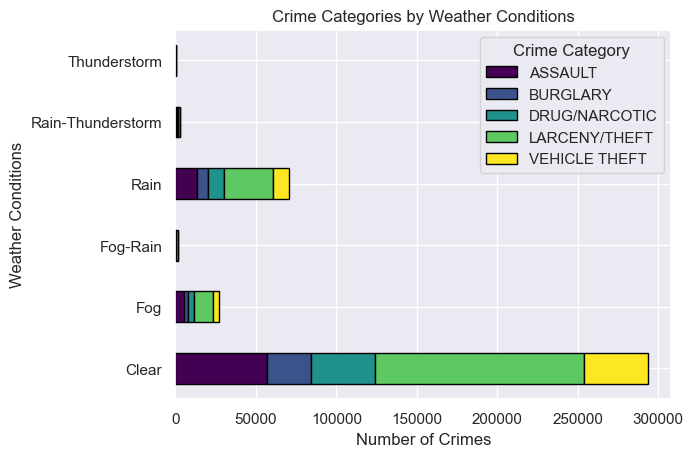

In [366]:
# Let us undertake a data visualization analysis to elucidate the correlation between crime
# rates and specific meteorological conditions

import matplotlib.pyplot as plt
filter_df['Events'].fillna('Clear', inplace=True)
grouped_data = filter_df.groupby('Events')['Category'].value_counts().unstack()

plt.figure(figsize=(10, 8))
grouped_data.plot(kind='barh', stacked=True, colormap='viridis', edgecolor='black')
plt.title('Crime Categories by Weather Conditions')
plt.xlabel('Number of Crimes')
plt.ylabel('Weather Conditions')
plt.legend(title='Crime Category')

plt.show()

In [367]:
# Crime rates show a distinct pattern based on weather conditions. More crimes tend to happen
# during clear weather, followed by an increase during rainy days as the second most common
# scenario. Foggy conditions come next, ranking third in terms of crime frequency. Surprisingly
# the fewest crimes occur during thunderstorms, presenting a notable contrast to other weather
# situations.

In [368]:
# We are creating the contingence table for further research
contingency_table = pd.crosstab(filter_df['Category'], filter_df['Events'])
contingency_table

Events,Clear,Fog,Fog-Rain,Rain,Rain-Thunderstorm,Thunderstorm
Category,,,,,,
ASSAULT,57055,5151,298,13733,601,38
BURGLARY,27063,2506,142,6741,282,21
DRUG/NARCOTIC,39884,3635,240,9733,455,24
LARCENY/THEFT,129875,12267,683,30711,1235,129
VEHICLE THEFT,39575,3550,259,9923,450,24


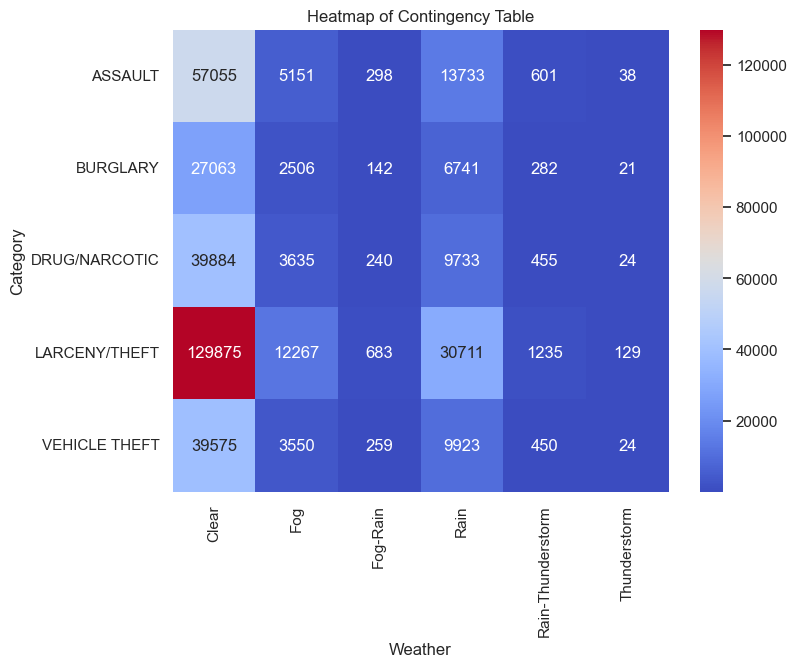

In [369]:
# Here is a heatmap which provides a visual representation that allows us to discern the #
# association between two categorical variables.
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm', cbar=True)
plt.title('Heatmap of Contingency Table')
plt.xlabel('Weather')
plt.ylabel('Category')
plt.show()

In [370]:
# Now we're more curious about whether weather has any impact on crime rates. To find out, #
# let's use the Chi-Square (Chi²) test to see if there's a meaningful connection between two #
# things: Weather and Crimes. (Metha, 2022)

# We are using the chi2_contingency package which is useful to calculate the p-value
from scipy.stats import chi2_contingency
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-Quadrat-Wert: {chi2}")
print(f"P-Wert: {p}")


Chi-Quadrat-Wert: 83.03607357861694
P-Wert: 1.1912442344550702e-09


In [371]:
# The Chi-Square test shows a strong association between crime categories and weather #
# condition. Typically less than 0.05 indicates that the observed association is unlikely to #
# be due to random chance (actual value: 1.1912442344550702e-09 smaller than 0.05), leading to#
# the rejection of # the null hypothesis. In summary, there is a significant relationship #
# between crime categories and weather conditions in the dataset. Since we dont know how #
# strong the relationship is, we will look further into it with Cramérs V-Value. (bhuwanesh, 2022)

import numpy as np

X2 = chi2_contingency(contingency_table, correction=False)[0]
N = np.sum(contingency_table)
minimum_dimension = min(contingency_table.shape)-1

# result of Cramers V
cramers_v = np.sqrt((X2/N) / minimum_dimension)
cramers_v


Events
Clear                0.008411
Fog                  0.027672
Fog-Rain             0.113130
Rain                 0.017118
Rain-Thunderstorm    0.082868
Thunderstorm         0.296584
dtype: float64

In [372]:
# The strongest association appears to be with "Thunderstorm" for all crime categories, #
# indicating a relatively strong relationship between the occurrence of thunderstorms and the #
# different types of crimes. The other associations are generally weaker, with "Clear" and #
# "Rain" showing little or no association for most crime categories.

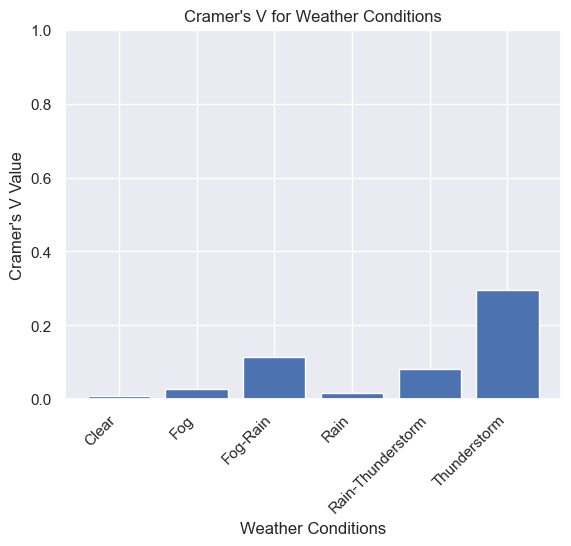

In [373]:
# We will visualize the strength from Cramer's V
labels = contingency_table.columns
plt.bar(labels, cramers_v)
plt.xlabel('Weather Conditions')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)

plt.ylabel("Cramer's V Value")
plt.title("Cramer's V for Weather Conditions")
plt.show()

In [374]:
# We can see that the weather plays in some way a role in crimes. We used a method called #
# Chi-Square to check the connection between crimes and different weather conditions. It turns
# out that most crimes happen when the weather is clear. But when we used Cramer's #
# calculation, we found something interesting – Thunderstorms are linked the strongest with #
# crimes. This tells us that the kind of weather somehow matters when it comes to crime. #
# Having explored the impact of weather conditions, we will now shift our focus to another #
# feature: 'political directions'.


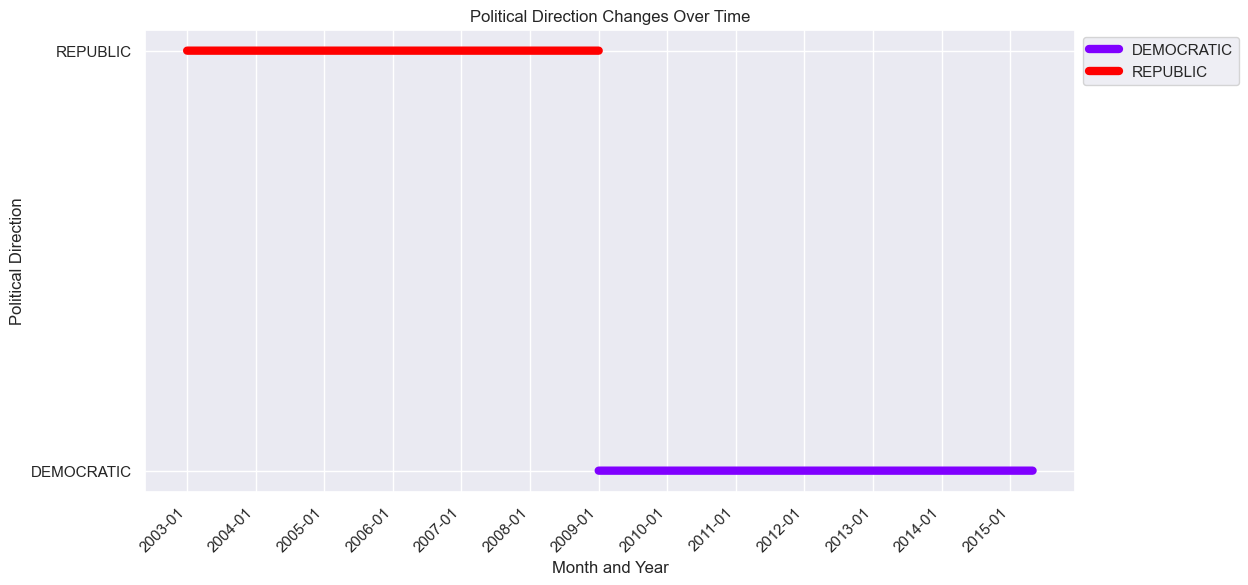

In [375]:
# First lets visualize the political direction to show what politcal power were present at #
# that time
import matplotlib.dates as mdates

# We group the date in months and convert it to timestamp
filter_df['MonthYear'] = filter_df['Dates'].dt.to_period('M')
filter_df['MonthNumeric'] = filter_df['MonthYear'].dt.to_timestamp()

# We define color for each unique political direction 'Democratic' and 'Republic'
unique_directions = filter_df['POLITICAL DIRECTION'].unique()
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_directions)))

plt.figure(figsize=(12, 6))
# Here we are drawing our plot
for i, direction in enumerate(unique_directions):
    subset = filter_df[filter_df['POLITICAL DIRECTION'] == direction]
    plt.plot(subset['MonthNumeric'], subset['POLITICAL DIRECTION'], color=colors[i], label=direction, linewidth=6)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.xticks(rotation=45, ha='right')
plt.title('Political Direction Changes Over Time')
plt.xlabel('Month and Year')
plt.ylabel('Political Direction')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Since we don't need these columns anymore we will drop them
filter_df.drop(['MonthYear', 'MonthNumeric'], axis=1, inplace=True)


In [376]:
# Both political parties ruled for the same amount of time, and this is crucial when examining:
# The number of crimes that occurred.
# Now, let's summarize the total crimes during the regimes of the two political parties.

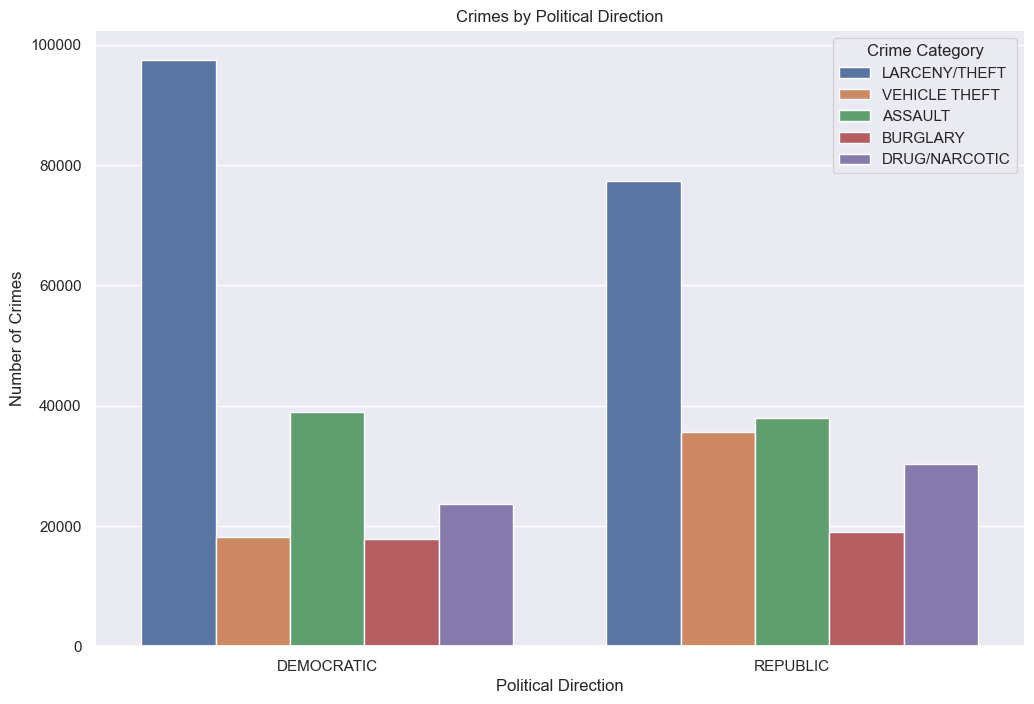

In [377]:
filter_df

plt.figure(figsize=(12, 8))
sns.countplot(x='POLITICAL DIRECTION', hue='Category', data=filter_df)
plt.title('Crimes by Political Direction')
plt.xlabel('Political Direction')
plt.ylabel('Number of Crimes')
plt.legend(title='Crime Category', loc='upper right')
plt.show()

In [378]:
# Analysis of crime data reveals that the highest occurrences of 'Larceny/Theft' were observed
# during the democratic regime, whereas 'Vehicle Theft' incidents were comparatively lower #
# than in the Republic regime. Incidences of 'Assault' and 'Burglary' remained nearly #
# consistent across both regimes. Furthermore, 'Drug/Narcotic' offenses showed a slight #
# decrease in the democratic regime.
# To determine whether political directions significantly influence crime rates, we will #
# conduct a Chi-Square test, building upon the insights gained from the earlier example.

In [379]:
# We need to create a contigence table with the political direction and crimes
contingency_table = pd.crosstab(filter_df['Category'], filter_df['POLITICAL DIRECTION'])
contingency_table

POLITICAL DIRECTION,DEMOCRATIC,REPUBLIC
Category,,
ASSAULT,38992,37884
BURGLARY,17797,18958
DRUG/NARCOTIC,23713,30258
LARCENY/THEFT,97511,77389
VEHICLE THEFT,18222,35559


In [380]:
# Now can use the Chi square test
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-Quadrat-Wert: {chi2}")
print(f"P-Wert: {p}")

Chi-Quadrat-Wert: 8714.279249424002
P-Wert: 0.0


In [381]:
# The chi-square test result of 8714.28 with a p-value of 0.0 indicates a strong connection #
# between the categories of "crimes" and "political directions." This suggests that there is a
# significant association or difference in the distribution of crimes across different #
# political directions. In simpler terms, it's likely that the type or frequency of crimes is #
# not random and is somehow linked to political directions. #
# Given the significant results from the chi-square test, we are now proceeding to calculate #
# Cramer's V to better quantify the strength of the observed association between "crimes" and #
# "political directions." #

In [382]:
X2 = chi2_contingency(contingency_table, correction=False)[0]
N = np.sum(contingency_table)
minimum_dimension = min(contingency_table.shape)-1

# result of Cramers V
cramers_v = np.sqrt((X2/N) / minimum_dimension)
cramers_v


POLITICAL DIRECTION
DEMOCRATIC    0.210731
REPUBLIC      0.208713
dtype: float64

In [383]:
# The Cramer's V values (0.210731 for "DEMOCRATIC" and 0.208713 for "REPUBLIC") suggest a weak
# association between the political direction of a regime and different crime categories. #
# While there is some connection, it's not a strong influence on the distribution of crime #
# types.

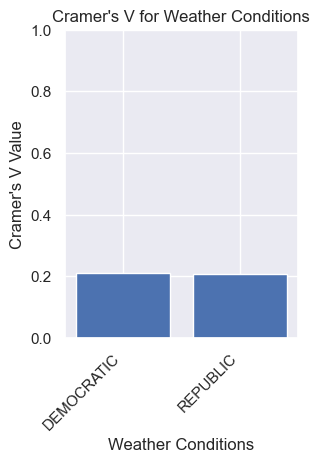

In [387]:
labels = contingency_table.columns

plt.figure(figsize=(3, 4))

plt.bar(labels, cramers_v)
plt.xlabel('Weather Conditions')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.ylabel("Cramer's V Value")
plt.title("Cramer's V for Weather Conditions")
plt.show()

In [384]:
# We conducted an analysis of two external factors: weather conditions and political #
# directions. Our observations indicate that weather conditions exhibit a modest to minimal #
# association with crime occurrences. Conversely, political direction appears to have a #
# relatively weak influence on crime rates, as the association is notably feeble. To validate #
# these findings, we employed a chi-square test to assess the presence of an association, with
# the Cramer's V value used to gauge the strength of any identified associations.

In [ ]:
# sources
# Mehta, Sourabh (2022). "How to use the Chi-Square Test for two categorical variables?". https://analyticsindiamag.com/how-to-use-the-chi-square-test-for-two-categorical-variables/
##
# bhuwanesh (2022). "How to Calculate Cramer’s V in Python?". https://www.geeksforgeeks.org/how-to-calculate-cramers-v-in-python/
##
# Zoni Nation (2016). "Weather CSV". "https://github.com/zonination/weather-us/commits/master/sanfrancisco.csv"
##
# McDonald, Forrest; Levy, Michael (2023). "Presidents of the United States". https://www.britannica.com/topic/presidency-of-the-United-States-of-America/Presidents-of-the-United-States

